In [65]:
import pandas as pd
import numpy as np
import seaborn as snsh
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [66]:
df1=pd.read_csv('power_actual.csv')
df2=pd.read_csv('weather_actuals.csv')
test=pd.read_csv('weather_forecast.csv')

In [67]:
df1.head()

,Unnamed: 0,datetime,ghi,gti,power
0,0,10/1/2017 0:00,0.0,0.0,0.0
1,1,10/1/2017 0:15,0.0,0.0,0.0
2,2,10/1/2017 0:30,0.0,0.0,0.0
3,3,10/1/2017 0:45,0.0,0.0,0.0
4,4,10/1/2017 1:00,0.0,0.0,0.0


In [68]:
df2.head()

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,...,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,0,1,9/30/2017 18:30,10/1/2017 0:00,0.0,26.52,26,1,19.46,308,...,-9999.0,-9999.0,-9999.0,rain,3.57,10/1/2017 0:52,10/1/2017 12:45,clear-night,Clear,7/16/2019 16:37
1,1,1,9/30/2017 19:30,10/1/2017 1:00,0.0,28.78,27,1,20.06,-9999,...,-9999.0,-9999.0,-9999.0,rain,3.06,10/1/2017 0:52,10/1/2017 12:45,fog,Foggy,7/16/2019 16:37
2,2,1,9/30/2017 20:30,10/1/2017 2:00,0.0,26.58,26,1,19.97,-9999,...,-9999.0,-9999.0,-9999.0,rain,3.06,10/1/2017 0:52,10/1/2017 12:45,fog,Foggy,7/16/2019 16:37
3,3,1,9/30/2017 21:30,10/1/2017 3:00,0.0,23.84,23,1,18.66,270,...,-9999.0,-9999.0,-9999.0,rain,3.56,10/1/2017 0:52,10/1/2017 12:45,clear-night,Clear,7/16/2019 16:37
4,4,1,9/30/2017 22:30,10/1/2017 4:00,0.0,24.13,24,1,17.84,-9999,...,-9999.0,-9999.0,-9999.0,rain,3.06,10/1/2017 0:52,10/1/2017 12:45,fog,Foggy,7/16/2019 16:37


In [69]:
train = pd.merge(df1,df2)

In [70]:
train.head()

,Unnamed: 0,datetime,ghi,gti,power,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,...,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,0,10/1/2017 0:00,0.0,0.0,0.0,1,9/30/2017 18:30,10/1/2017 0:00,0.0,26.52,...,-9999.0,-9999.0,-9999.0,rain,3.57,10/1/2017 0:52,10/1/2017 12:45,clear-night,Clear,7/16/2019 16:37
1,1,10/1/2017 0:15,0.0,0.0,0.0,1,9/30/2017 19:30,10/1/2017 1:00,0.0,28.78,...,-9999.0,-9999.0,-9999.0,rain,3.06,10/1/2017 0:52,10/1/2017 12:45,fog,Foggy,7/16/2019 16:37
2,2,10/1/2017 0:30,0.0,0.0,0.0,1,9/30/2017 20:30,10/1/2017 2:00,0.0,26.58,...,-9999.0,-9999.0,-9999.0,rain,3.06,10/1/2017 0:52,10/1/2017 12:45,fog,Foggy,7/16/2019 16:37
3,3,10/1/2017 0:45,0.0,0.0,0.0,1,9/30/2017 21:30,10/1/2017 3:00,0.0,23.84,...,-9999.0,-9999.0,-9999.0,rain,3.56,10/1/2017 0:52,10/1/2017 12:45,clear-night,Clear,7/16/2019 16:37
4,4,10/1/2017 1:00,0.0,0.0,0.0,1,9/30/2017 22:30,10/1/2017 4:00,0.0,24.13,...,-9999.0,-9999.0,-9999.0,rain,3.06,10/1/2017 0:52,10/1/2017 12:45,fog,Foggy,7/16/2019 16:37


In [71]:
train.shape

(13619, 35)

In [72]:
train.describe()

,Unnamed: 0,ghi,gti,power,plant_id,cloud_cover,apparent_temperature,temperature,humidity,dew_point,...,qpf,uv_index,snow,pop,fctcode,ozone,precip_accumulation,precip_intensity,precip_probability,visibility
count,13619.000000,6803.0,6803.0,13619.000000,13619.0,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,...,3744.0,13619.000000,3744.0,3744.0,3744.0,13619.000000,3744.0,13619.000000,13619.000000,13619.000000
mean,6809.000000,0.0,0.0,3.194072,1.0,-314.005310,25.944639,24.498054,0.537411,11.924626,...,-9999.0,-2394.989280,-9999.0,-9999.0,-9999.0,-2187.730797,-9999.0,-2396.367775,-2396.398081,-117.086149
std,3931.610993,0.0,0.0,4.903338,0.0,1744.610028,10.469808,8.840016,0.498617,9.129459,...,0.0,4269.320576,0.0,0.0,0.0,4385.706548,0.0,4268.545854,4268.528833,1130.763316
min,0.000000,0.0,0.0,0.000000,1.0,-9999.000000,3.140000,5.000000,0.000000,-20.560000,...,-9999.0,-9999.000000,-9999.0,-9999.0,-9999.0,-9999.000000,-9999.0,-9999.000000,-9999.000000,-9999.000000
25%,3404.500000,0.0,0.0,0.000000,1.0,0.000000,17.310000,17.000000,0.000000,5.920000,...,-9999.0,0.000000,-9999.0,-9999.0,-9999.0,236.900000,-9999.0,0.000000,0.000000,3.540000
50%,6809.000000,0.0,0.0,0.000000,1.0,0.000000,25.540000,25.000000,1.000000,10.710000,...,-9999.0,0.000000,-9999.0,-9999.0,-9999.0,270.800000,-9999.0,0.000000,0.000000,16.090000
75%,10213.500000,0.0,0.0,6.090000,1.0,0.410000,34.580000,31.000000,1.000000,19.670000,...,-9999.0,2.000000,-9999.0,-9999.0,-9999.0,280.800000,-9999.0,0.000000,0.000000,16.090000
max,13618.000000,0.0,0.0,17.180000,1.0,1.000000,49.750000,47.000000,1.000000,28.350000,...,-9999.0,12.000000,-9999.0,-9999.0,-9999.0,351.700000,-9999.0,6.220000,0.730000,16.090000


In [73]:
train.describe(include=['O'])

,datetime,datetime_utc,datetime_local,precip_type,sunrise,sunset,icon,summary,updated_at
count,13619,13619,13619,6490,13619,13619,13619,13619,13619
unique,13619,13619,13619,2,568,568,8,19,56
top,1/11/2018 14:00,3/16/2019 13:30,1/11/2018 14:00,rain,6/5/2019 0:00,5/25/2019 13:49,clear-night,Clear,7/16/2019 16:37
freq,1,1,1,6147,24,24,3075,5567,3744


In [74]:
train.corr() 

,Unnamed: 0,ghi,gti,power,plant_id,cloud_cover,apparent_temperature,temperature,humidity,dew_point,...,qpf,uv_index,snow,pop,fctcode,ozone,precip_accumulation,precip_intensity,precip_probability,visibility
Unnamed: 0,1.000000,NaN,NaN,-0.013877,NaN,0.214831,0.506807,0.459176,-0.082972,0.245485,...,NaN,0.739429,NaN,NaN,NaN,0.739716,NaN,0.739380,0.739377,0.096399
ghi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power,-0.013877,NaN,NaN,1.000000,NaN,0.010769,0.017264,0.009693,0.034256,0.057174,...,NaN,-0.028348,NaN,NaN,NaN,-0.028344,NaN,-0.028343,-0.028343,-0.012012
plant_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cloud_cover,0.214831,NaN,NaN,0.010769,NaN,1.000000,0.166379,0.164960,-0.071690,0.062932,...,NaN,0.320889,NaN,NaN,NaN,0.320888,NaN,0.320889,0.320889,-0.018911
apparent_temperature,0.506807,NaN,NaN,0.017264,NaN,0.166379,1.000000,0.969744,-0.181759,0.567757,...,NaN,0.385864,NaN,NaN,NaN,0.386468,NaN,0.385658,0.385654,0.028750
temperature,0.459176,NaN,NaN,0.009693,NaN,0.164960,0.969744,1.000000,-0.324518,0.432929,...,NaN,0.368620,NaN,NaN,NaN,0.369282,NaN,0.368406,0.368404,0.014180
humidity,-0.082972,NaN,NaN,0.034256,NaN,-0.071690,-0.181759,-0.324518,1.000000,0.497798,...,NaN,-0.185654,NaN,NaN,NaN,-0.185402,NaN,-0.185555,-0.185561,0.053018
dew_point,0.245485,NaN,NaN,0.057174,NaN,0.062932,0.567757,0.432929,0.497798,1.000000,...,NaN,0.085216,NaN,NaN,NaN,0.085929,NaN,0.085163,0.085154,0.046960


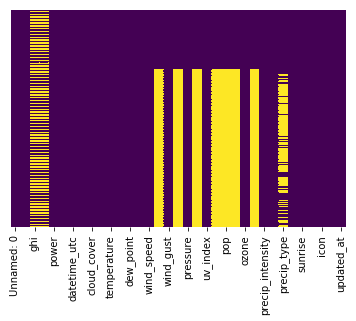

In [75]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [76]:
#Columns with too many mising values are unlikely to carry much useful information
#Thus columns with max no of missing value and less informative columns removed.

In [77]:
train.drop(['ghi','gti','plant_id','wind_chill','snow','pop','qpf','fctcode','precip_accumulation','heat_index','Unnamed: 0','precip_type'],axis=1,inplace=True)

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13619 entries, 0 to 13618
Data columns (total 23 columns):
datetime                13619 non-null object
power                   13619 non-null float64
datetime_utc            13619 non-null object
datetime_local          13619 non-null object
cloud_cover             13619 non-null float64
apparent_temperature    13619 non-null float64
temperature             13619 non-null int64
humidity                13619 non-null int64
dew_point               13619 non-null float64
wind_bearing            13619 non-null int64
wind_speed              13619 non-null float64
wind_gust               13619 non-null float64
pressure                13619 non-null float64
uv_index                13619 non-null int64
ozone                   13619 non-null float64
precip_intensity        13619 non-null float64
precip_probability      13619 non-null float64
visibility              13619 non-null float64
sunrise                 13619 non-null object
sunset    

In [79]:
train['icon'].unique()

array(['clear-night', 'fog', 'clear-day', 'partly-cloudy-day',
       'partly-cloudy-night', 'wind', 'cloudy', 'rain'], dtype=object)

In [80]:
train['summary'].unique()

array(['Clear', 'Foggy', 'Partly Cloudy', 'Mostly Cloudy',
       'Breezy and Foggy', 'Overcast', 'Humid and Partly Cloudy',
       'Humid and Mostly Cloudy', 'Humid and Overcast', 'Humid and Foggy',
       'Possible Light Rain and Humid', 'Humid', 'Possible Light Rain',
       'Rain', 'Light Rain', 'Light Rain and Humid',
       'Possible Drizzle and Humid', 'Rain and Humid', 'Possible Drizzle'],
      dtype=object)

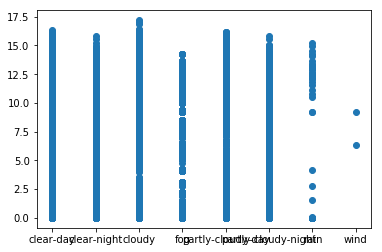

In [81]:
plt.scatter(x='icon',y='power',data=train)

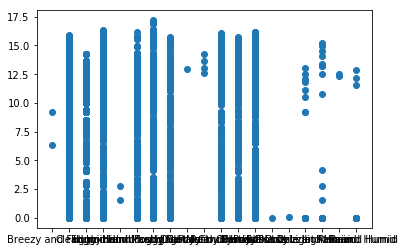

In [82]:
plt.scatter(x='summary',y='power',data=train)

In [83]:
train.drop(['icon'],axis=1,inplace=True) #As summary and Icon columns are collinear with each other hence here I removed ICON column.

In [84]:
SUMM=pd.get_dummies(train['summary'],drop_first=True)

In [85]:
train=pd.concat([train,SUMM],axis=1)

In [86]:
train.drop(['summary'],axis=1,inplace=True)

In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13619 entries, 0 to 13618
Data columns (total 39 columns):
datetime                         13619 non-null object
power                            13619 non-null float64
datetime_utc                     13619 non-null object
datetime_local                   13619 non-null object
cloud_cover                      13619 non-null float64
apparent_temperature             13619 non-null float64
temperature                      13619 non-null int64
humidity                         13619 non-null int64
dew_point                        13619 non-null float64
wind_bearing                     13619 non-null int64
wind_speed                       13619 non-null float64
wind_gust                        13619 non-null float64
pressure                         13619 non-null float64
uv_index                         13619 non-null int64
ozone                            13619 non-null float64
precip_intensity                 13619 non-null float64
precip

In [88]:
train.columns

Index(['datetime', 'power', 'datetime_utc', 'datetime_local', 'cloud_cover',
       'apparent_temperature', 'temperature', 'humidity', 'dew_point',
       'wind_bearing', 'wind_speed', 'wind_gust', 'pressure', 'uv_index',
       'ozone', 'precip_intensity', 'precip_probability', 'visibility',
       'sunrise', 'sunset', 'updated_at', 'Clear', 'Foggy', 'Humid',
       'Humid and Foggy', 'Humid and Mostly Cloudy', 'Humid and Overcast',
       'Humid and Partly Cloudy', 'Light Rain', 'Light Rain and Humid',
       'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'Possible Drizzle',
       'Possible Drizzle and Humid', 'Possible Light Rain',
       'Possible Light Rain and Humid', 'Rain', 'Rain and Humid'],
      dtype='object')

In [90]:
X = train.iloc[:,[4,5,6,8,9,10,11,13,12,14,15,16,17,21,23,25,26,27,28,29,31,32,33,34,35,36,38,37]].values   
y = train.iloc[:,1].values 

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)

In [93]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [100]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc =sc.fit_transform(X_test)

----------------Creat a correlation plot---------------


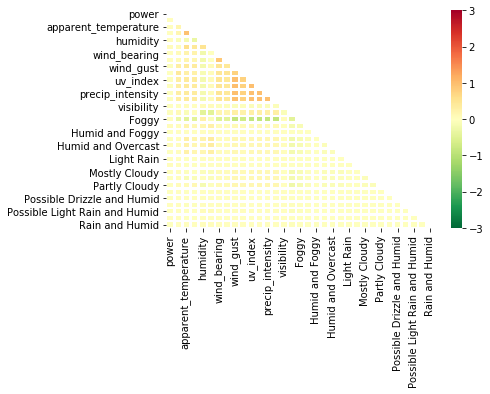

In [101]:
train_df =train.corr(method='pearson')
print("----------------Creat a correlation plot---------------")
#create a mask to display only the lower triangle of the matrix since its mirrored around its top leftto bottom-right diagonal)
mask=np.zeros_like(train_df)
mask[np.triu_indices_from(mask)]=True
#create a heatmap using seaborn library
sns.heatmap(train_df,cmap='RdYlGn_r',vmax=3.0,vmin=-3.0,mask=mask,linewidths=1.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

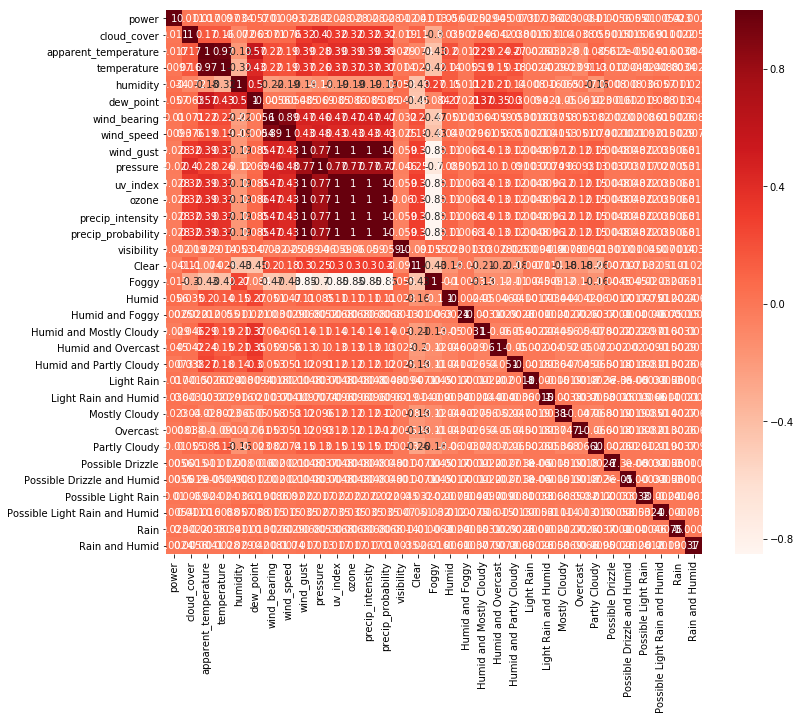

In [102]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [103]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [104]:
lr.fit(X_train_sc,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [105]:
lr_pred = lr.predict(X_test_sc)

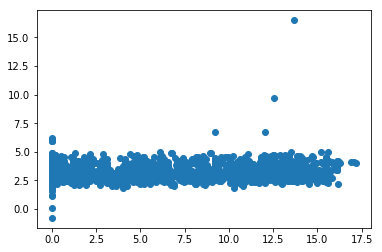

In [109]:
plt.scatter(y_test,lr_pred)

In [106]:
from sklearn import metrics

In [107]:
print('MAE:', metrics.mean_absolute_error(y_test, lr_pred))
print('MSE:', metrics.mean_squared_error(y_test, lr_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

MAE: 4.1120811087092
MSE: 23.710218359669227
RMSE: 4.8693139516434165


In [111]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [112]:
rf = RandomForestRegressor(max_depth=7,n_estimators=150).fit(X_train_sc,y_train)

In [113]:
y_predicted = rf.predict(X_test_sc)

In [114]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

MAE: 4.966048387244739
MSE: 28.572571129531422
RMSE: 5.345331713704157
